# Algoritmo CB
## El algoritmo CB es el algoritmo que unicamente utiliza el boton "siguiente" para ir de una canción a otra y tiene 1 de probabilidad de que lo haga en d pasos siendo d la distancia en pasos que hay de una canción a otra, siendo el peor escenario que el algoritmo haga $n-1$ pasos


In [7]:
import random
import matplotlib.pyplot as plt

In [8]:
def CB_mostrar(lista,a,b):
    i=a
    cont = 0
    while(i!=b):
        if(i>=(len(lista))-1):
            print(f"{lista[i]} -> {lista[0]}")
            i = -1
        else:
            print(f"{lista[i]} -> {lista[i+1]}")
        i+=1
        
        cont+=1
    #print(f"Cantidad de pasos CB: {cont}")
    return cont 


In [9]:
def CB(lista,a,b):
    i=a
    cont = 0
    while(i!=b):
        if(i>=(len(lista))-1):
            #print(f"{lista[i]} -> {lista[0]}")
            i = -1
        else:
            pass
            #print(f"{lista[i]} -> {lista[i+1]}")
        i+=1
        
        cont+=1
    #print(f"Cantidad de pasos: {cont}")
    return cont 

# Definimos si algo esta cerca
# la metrica que usamos para denotar que una canción esté cerca es: $\epsilon$

In [10]:
def estaCerca(b,i,e,lista):
    esCerca = False
    lisCerca=[]
    if (b-e)-1<0:
        #print("estoy aqui")
        lisCerca = lista[((b-e)):]
        lisCerca2=(lista[:(e-(e-b))])
        existe = lisCerca.count(i+1)
        existe2 = lisCerca2.count(i+1)
        if existe > 0 or existe2 >0:
            esCerca = True
    else:
        #print("estoy aca")
        if i <= b and i >= (b)-e:
            esCerca = True
    
    return esCerca 


# Algoritmo AC
## El algoritmo AC se puede resumir como: "Si no estás cerca de la canción destino,entonces presiona aleatorio, si estás cerca de la canción destino, utiliza el algoritmo CB
## Para este algoritmo el mejor de los casos es que con un solo paso se pueda llegar a la canción destino, pero se tiene $\frac{1}{n}$ probabilidad de que esto pase, el peor de los escenarios es que el algoritmo practicamente nunca acabe porque la probabilidad de que al presionar aleatorio y nos de una canción que esté cerca o que sea la canción destino es:  $\frac{\epsilon+1}{n}$ por eso hay que ser razonables a la hora de escoger nuestro epsilon acorde a la cantidad de canciones que hay en nuestra lista

In [11]:
def AC_mostrar(lista,a,b,e,n):
    i=a
    cont = 0
    #random.seed(a)
    while(i!=b):
        if estaCerca(b=b,i=i,e=e,lista=lista):
            cont+=CB_mostrar(lista,i,b)
            i=b
        else:
            i=random.randint(0,n-1)
            print(f"Canción aleatoria: {i+1}")
            cont+=1
    #print(f"Cantidad de pasos: {cont}")
    return cont



In [12]:
def AC(lista,a,b,e,n):
    i=a
    cont = 0
    #random.seed(a)
    while(i!=b):
        
        if estaCerca(b=b,i=i,e=e,lista=lista):
            cont+=CB(lista,i,b)
            i=b
        else:
            
            i=random.randint(0,n-1)
            #print(f"i alea: {i}")
            cont+=1
    #print(f"Cantidad de pasos: {cont}")
    return cont

# Simulando la lista de reproducción 

## El usuario va a ingresar su lista de canciones ordenada:

In [13]:
lista_canciones = [1,2,3,4,5,6,7,8,9,10,11,12]
n=len(lista_canciones)
n

12

## El usuario va a escoger su medida de ¿cuanto para mi es cerca? -- su medida debe ser números enteros y positivos

In [14]:
e = int(len(lista_canciones)*0.1 +1)
print(f"Se considera estar cerca cuando está a {e} canciones atrás de la canción destino")

Se considera estar cerca cuando está a 2 canciones atrás de la canción destino


## La canción inicial puede ser aleatoria o puede ser escogida por el usuario:

In [21]:

k=0
a=0
print("Si quieres empezar con una canción aleatoria presiona 1, si no presiona 2")
k=int(input())
print(k)
if(k==1):
    a=random.randint(1, len(lista_canciones))
    print(f"tu canción inicial es: {a}")
    a=lista_canciones.index(a)
else:
    print("Escoge la canción que quieras dentro de la lista")
    a=int(input())
    print(f"Tu canción inicial es: {a}")
    a=lista_canciones.index(a)
   

Si quieres empezar con una canción aleatoria presiona 1, si no presiona 2
2
Escoge la canción que quieras dentro de la lista
Tu canción inicial es: 1


In [22]:
print("Escoge la canción a la que quieras ir de la lista")
b=int(input())
print(f"Tu canción destino es: {b}")
b=lista_canciones.index(b)

Escoge la canción a la que quieras ir de la lista
Tu canción destino es: 12


## Calcularemos la distancia o el número de pasos que se necesitan para ir de la canción 'a' a la canción 'b'

In [23]:
d = CB(lista_canciones,a,b)
print(f"Cantidad de pasos necesarios para ir de 'a' a 'b' es: {d}")

Cantidad de pasos necesarios para ir de 'a' a 'b' es: 11


## Calculamos la probabilidad de que el Algoritmo AC tenga menor cantidad de pasos que el Algoritmo CB

In [24]:
suma_cont = 0
k=100000
for i in range(k):
    q = AC(lista_canciones,a,b,e,n)
    if(q<d):
        suma_cont+=1
print(f"La probabilidad es: {suma_cont/k}")

La probabilidad es: 0.92157


In [26]:
print("Si quieres usar el algoritmo AC presiona 1, si quieres usar el algoritmo CB presiona 2")
k=int(input())
print(k)
if(k==1):
    f=AC_mostrar(lista_canciones,a,b,e,n)
    print(f"Haz llegado a la canción destino en: {f} pasos")
else:
    f=CB_mostrar(lista_canciones,a,b)
    print(f"Haz llegado a la canción destino en: {f} pasos")

Si quieres usar el algoritmo AC presiona 1, si quieres usar el algoritmo CB presiona 2
1
Canción aleatoria: 6
Canción aleatoria: 4
Canción aleatoria: 12
Haz llegado a la canción destino en: 3 pasos


In [29]:

a=1
b=1
a=lista_canciones.index(a)
b=lista_canciones.index(b) 

k=1000000
pun = []
for i in range(n):
    print("b: ",b+1)
    d=CB(lista_canciones,a,b)
    print(f"Distancia: ",d)
    suma_cont = 0
    for i in range(k):
        q = AC(lista_canciones,a,b,e,n)
        if(q<d):
            suma_cont+=1
    #print(f"b: ",b)
    #print(f"Suma del conteo: {suma_cont}")
    print(f"probabilidad: {suma_cont /k}")
    pun.append(suma_cont/k)
    b+=1

b:  1
Distancia:  0
probabilidad: 0.0
b:  2
Distancia:  1
probabilidad: 0.0
b:  3
Distancia:  2
probabilidad: 0.0
b:  4
Distancia:  3
probabilidad: 0.228626
b:  5
Distancia:  4
probabilidad: 0.422435
b:  6
Distancia:  5
probabilidad: 0.565732
b:  7
Distancia:  6
probabilidad: 0.674733
b:  8
Distancia:  7
probabilidad: 0.755985
b:  9
Distancia:  8
probabilidad: 0.817389
b:  10
Distancia:  9
probabilidad: 0.86293
b:  11
Distancia:  10
probabilidad: 0.89727
b:  12
Distancia:  11
probabilidad: 0.923186


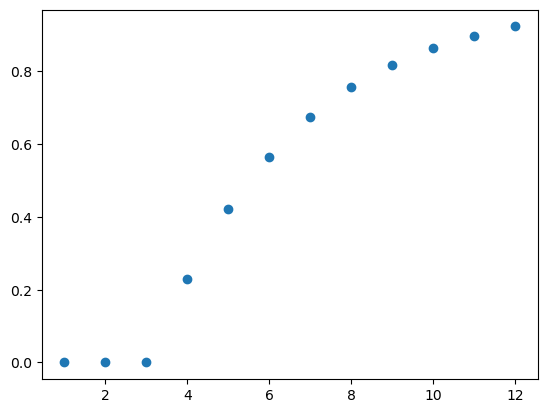

In [30]:
import matplotlib.pyplot as plt

n_pun = []

for i in range(1,n+1):
    n_pun.append(i)
plt.scatter(n_pun,pun)
plt.show()